In [29]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme();

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [30]:
df = pd.read_csv('../data/people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [31]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

id: [   0    1    2 ... 5497 5498 5499]
was_married: [1 0]
childrens: [4. 2. 6. 1. 9. 3. 0.]
salary: [ 45032.4  202004.64 213158.75 ...  34734.29  12667.06 201840.19]
sex: [1 0]
age: [ 82.  32.  14.  10.  99.  21.   9. 100.  11.  17.   3.  18.  20.  13.
  81.  31.  98.  33.   2.  83.]
profession: ['Engineer' 'Doctor' 'Entertainment' 'Lawyer' 'Artist' 'Homemaker'
 'Marketing' 'Healthcare' 'Executive']
home_cost: [10036744.1448104  10140513.66998146 10433180.96557762 ...
 10100751.71572328 10113206.54520742 10225124.27076279]
drive_info: [nan  0.  1.]


Смотрим значения признаков, имеем значения в:

* children, salary, age, home_cost = [4, 2, ...], [45032.4, 202004.64, ...], [82, 32, ...] - **численные**
* profession = ['Engineer', 'Doctor', ...] - **категориальный**
* was_married, drive_info, sex = [1, 0] - **бинарные**

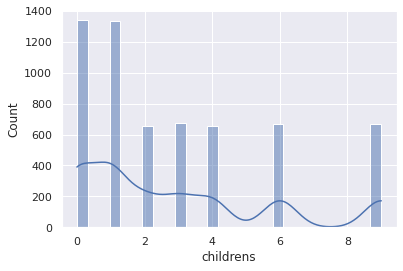

In [32]:
# Смотрим распределение у численных признаков по графикам
sns.histplot(df.childrens, kde=True)
plt.show()

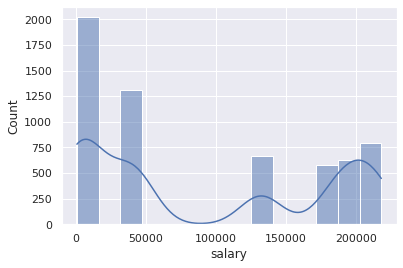

In [33]:
sns.histplot(df.salary, kde=True)
plt.show()

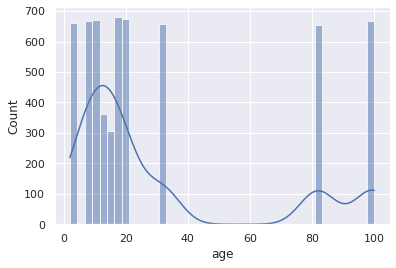

In [34]:
sns.histplot(df.age, kde=True)
plt.show()

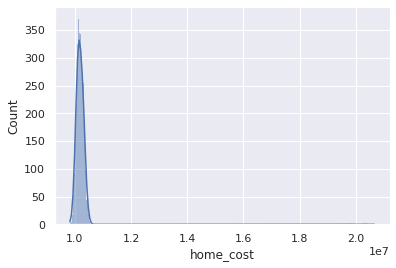

In [35]:
sns.histplot(df.home_cost, kde=True)
plt.show()

**Графически только признак home_cost с большой вероятностью имеет нормальное распределение**

In [36]:
# Смотрим количество пропусков у признака drive_info в датасете

df['drive_info'].isna().sum()

2770

**Предположительно, бессмысленным будет признак drive_info, так как он не соотносится ни с профессиями, предложенными в датасете, ни с другими численными и бинарными признаками, так как нет информации о наличии машины. Более того, почти половина значений в этом датасете с этим признаком пропущено (2770 из 6000).**

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` ) # Имелись в виду пропуски, раз вопрос про fillna(), dropna()?
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [37]:
# Группируем все строки 
rows = df.groupby(df.columns.tolist(), as_index=False).size()
rows

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info,size
0,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0,2
1,5,1,3.0,999.61,0,21.0,Homemaker,1.001654e+07,1.0,2
2,7,1,2.0,201589.78,1,32.0,Doctor,1.022668e+07,1.0,2
3,8,1,1.0,12912.69,1,9.0,Marketing,1.017361e+07,1.0,2
4,10,1,9.0,131822.41,1,100.0,Artist,1.037684e+07,1.0,2
...,...,...,...,...,...,...,...,...,...,...
2971,5493,1,6.0,215188.93,1,13.0,Entertainment,1.031287e+07,1.0,1
2972,5494,1,3.0,999.12,0,21.0,Homemaker,9.995216e+06,0.0,1
2973,5495,1,1.0,12676.77,1,9.0,Marketing,1.027045e+07,0.0,1
2974,5496,1,6.0,215570.69,1,13.0,Entertainment,1.032767e+07,1.0,1


In [38]:
# Смотрим количество дублей
len([size for size in rows['size'] if size > 1])

254

**В датасете присутствуют дубли (в количестве 254)**

In [39]:
df.isna().sum()

**Пропуски в данных присутствуют только в drive_info**

**Их можно было бы заменить на 0 [отсутствуют по умолчанию]. Заполнять медианным значение нельзя (признак бинарный), удалять тоже нельзя (таких пропусков почти половина датасета).**

In [40]:
# Заполняем 0
df.drive_info.fillna(0)

In [41]:
# Удаляем бессмысленный признак
newdf = df.drop(columns = ['drive_info'])
newdf

,id,was_married,childrens,salary,sex,age,profession,home_cost
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07
...,...,...,...,...,...,...,...,...
5995,495,1,0.0,37023.38,1,3.0,Executive,1.007038e+07
5996,496,1,3.0,999.66,0,20.0,Homemaker,1.009348e+07
5997,497,1,0.0,2042.76,0,17.0,Healthcare,1.016696e+07
5998,498,0,1.0,186560.45,0,10.0,Lawyer,1.025544e+07


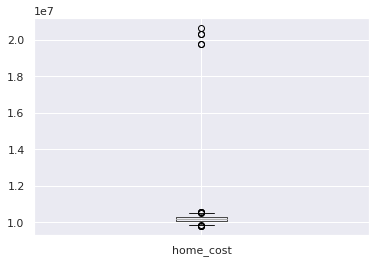

In [42]:
# Смотрим выбросы по boxplot
newdf.boxplot('home_cost');

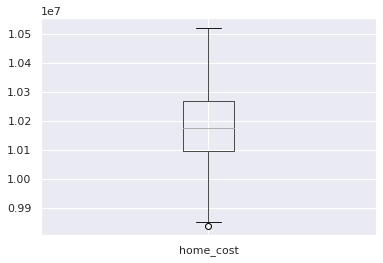

In [43]:
from matplotlib.cbook import boxplot_stats
# Находим значения выбросов на данный момент в home_cost
stats = boxplot_stats(df.home_cost)
newdf_wo = newdf
# Удаляем строки с выбросами
for outlier in stats[0]['fliers']:
    newdf_wo = newdf_wo.loc[(newdf_wo['home_cost'] != outlier)]
newdf_wo.boxplot('home_cost')
newdf_wo.shape

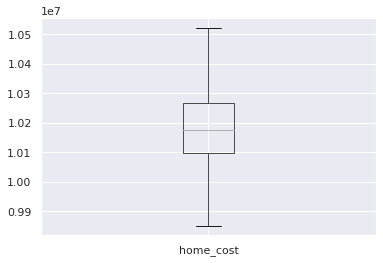

In [44]:
# Получили новый boxplot, но на нем все еще есть выбросы, повторяем то же самое
stats = boxplot_stats(newdf_wo.home_cost)
for outlier in stats[0]['fliers']:
    newdf_wo = newdf_wo.loc[(newdf_wo['home_cost'] != outlier)]
newdf_wo.boxplot('home_cost')
newdf_wo.shape

**Итого выбросов было 6000 - 5986 = 14**

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками


In [45]:
# one-hot кодирование
newdf_wo_onehot = newdf_wo.drop(['id'], axis=1)
for prof in newdf_wo_onehot['profession'].unique():
    newdf_wo_onehot[prof] = (newdf_wo_onehot['profession'] == prof).astype(int)
# Матрица корреляций, используем коэффициент корреляции Спирмана
corr_mat = newdf_wo_onehot.corr(method='spearman')
corr_mat

,was_married,childrens,salary,sex,age,home_cost,Engineer,Doctor,Entertainment,Lawyer,Artist,Homemaker,Marketing,Healthcare,Executive
was_married,1.000000,0.177642,-0.383124,0.337885,0.138559,-0.352327,0.151636,-0.254385,0.153452,-0.818571,0.153581,0.153710,0.152934,0.154870,0.152156
childrens,0.177642,1.000000,0.434198,0.370502,0.692525,0.319456,0.273342,0.000824,0.414195,-0.206057,0.553801,0.139062,-0.205362,-0.488289,-0.479731
salary,-0.383124,0.434198,1.000000,0.456955,0.126599,0.690916,0.001013,0.405434,0.545364,0.273810,0.136815,-0.546077,-0.268185,-0.410579,-0.132393
sex,0.337885,0.370502,0.456955,1.000000,0.087249,0.184146,0.244470,0.250560,0.253127,-0.496238,0.253340,-0.497074,0.252273,-0.500826,0.250989
age,0.138559,0.692525,0.126599,0.087249,1.000000,0.114849,0.406331,0.273526,-0.137752,-0.275298,0.547866,0.140047,-0.411041,0.000935,-0.543905
home_cost,-0.352327,0.319456,0.690916,0.184146,0.114849,1.000000,-0.145651,0.323849,0.365230,0.276427,0.138388,-0.268216,-0.243862,-0.282128,-0.162251
Engineer,0.151636,0.273342,0.001013,0.244470,0.406331,-0.145651,1.000000,-0.122866,-0.124125,-0.124125,-0.124229,-0.124334,-0.123706,-0.125272,-0.123076
Doctor,-0.254385,0.000824,0.405434,0.250560,0.273526,0.323849,-0.122866,1.000000,-0.124338,-0.124338,-0.124442,-0.124547,-0.123918,-0.125487,-0.123288
Entertainment,0.153452,0.414195,0.545364,0.253127,-0.137752,0.365230,-0.124125,-0.124338,1.000000,-0.125611,-0.125717,-0.125823,-0.125187,-0.126772,-0.124550
Lawyer,-0.818571,-0.206057,0.273810,-0.496238,-0.275298,0.276427,-0.124125,-0.124338,-0.125611,1.000000,-0.125717,-0.125823,-0.125187,-0.126772,-0.124550


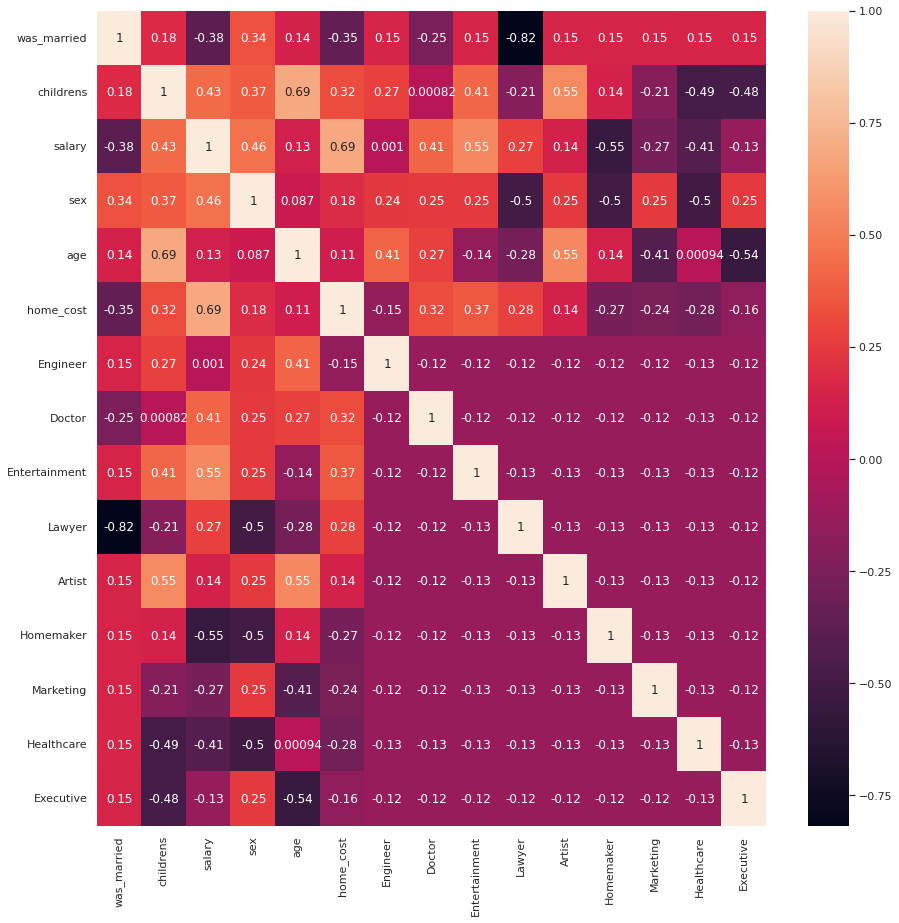

In [46]:
# Heatmap для матрицы корреляций
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot = True)

**Cамые скоррелированные признаки:**

* (childrens, age), (salary, home_cost) = 0.69,
* (salary, Entertainment), (childrens, Artist), (age,Artist) = 0.55

Значения коэффициента корреляции Спирмена находится в пределах [0.3,0.69] => наблюдаем умеренную положительную связь

* (Lawyer, was_married) = -0.82
* (Homemaker, salary) = -0.55

Значения коэффициента корреляции Спирмена находится в пределах [-0.3,-0.69] и в пределах [-0.7,-1] => наблюдаем умеренную отрицательную связь и сильно отрицательную связь

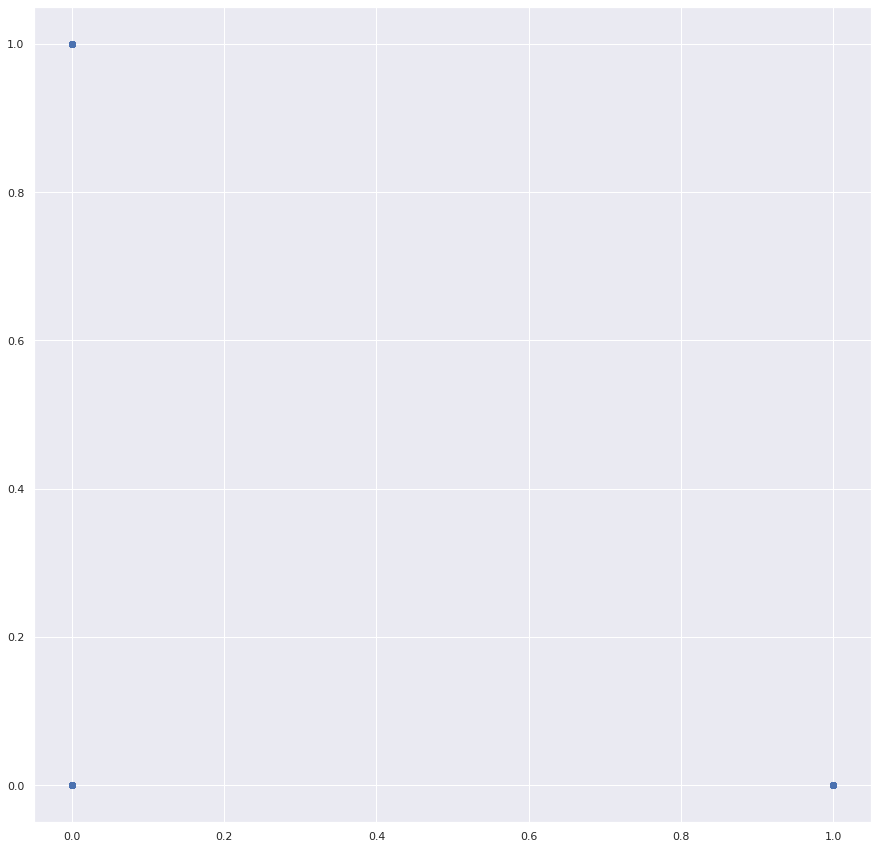

In [47]:
# Самый зависимый признак по Спирману: (Lawyer, was_married)
plt.figure(figsize=(15,15))
plt.scatter(newdf_wo_onehot.Lawyer, newdf_wo_onehot.was_married)

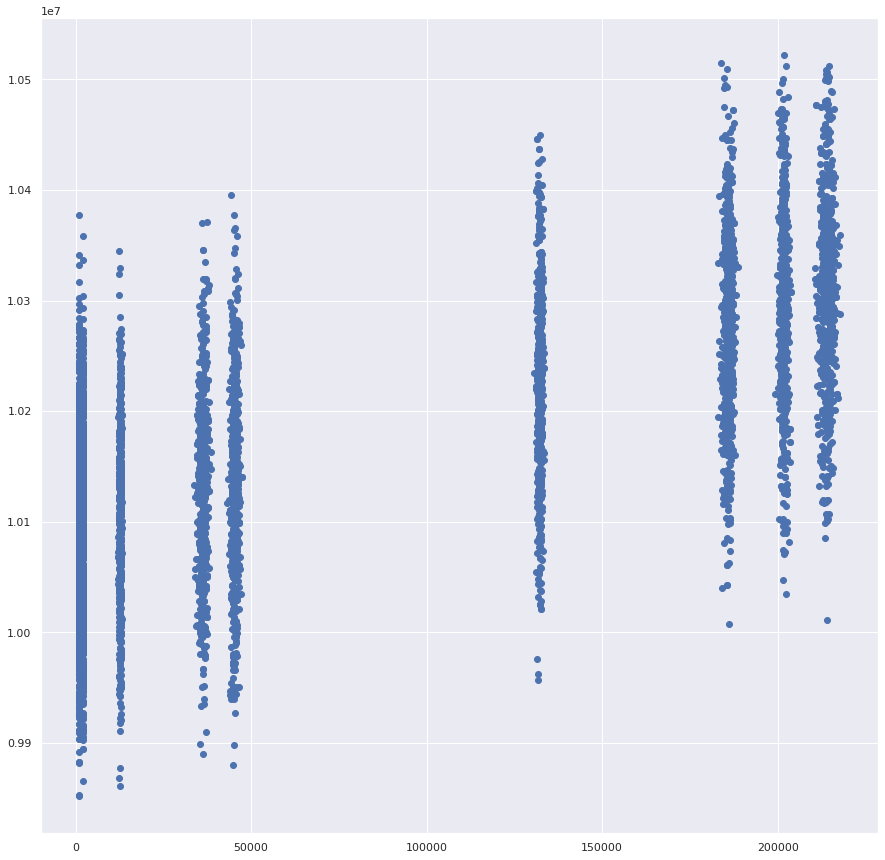

In [48]:
# Выглядит невпечатляюще, лучше посмотреть (salary, home_cost)
plt.figure(figsize=(15,15))
plt.scatter(newdf_wo_onehot.salary, newdf_wo_onehot.home_cost)

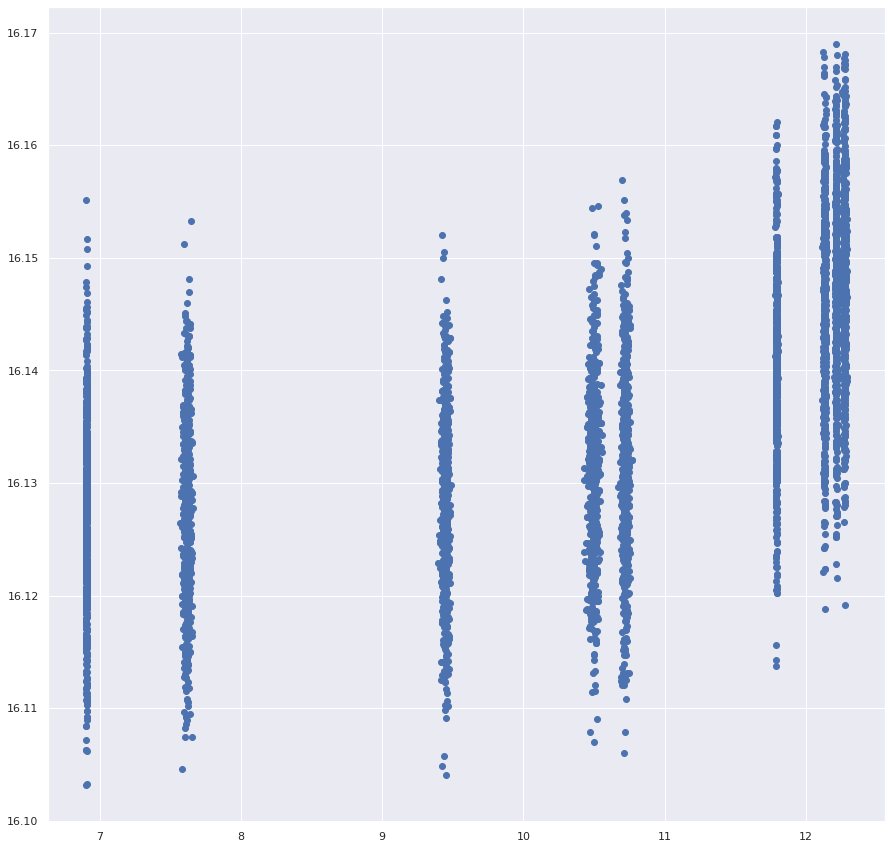

In [49]:
# Слишком большие значения, возьмем логарифм
plt.figure(figsize=(15,15))
plt.scatter(np.log(newdf_wo_onehot.salary), np.log(newdf_wo_onehot.home_cost))

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

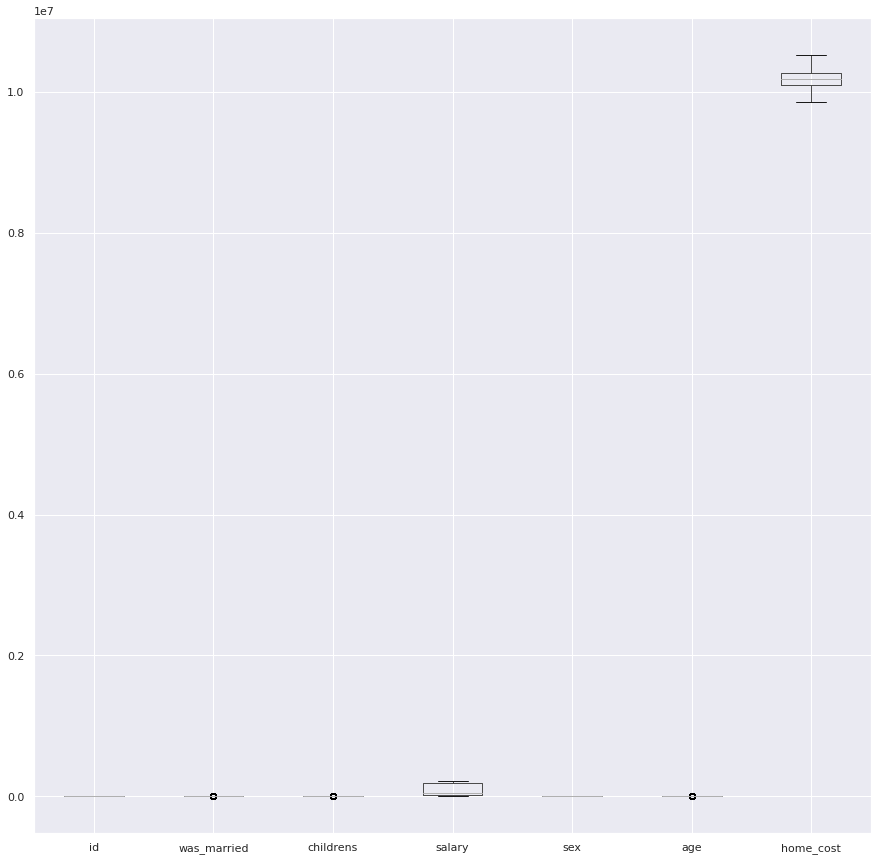

In [50]:
plt.figure(figsize=(15,15))
newdf_wo.boxplot()

In [51]:
from sklearn.preprocessing import RobustScaler 

norm_df = newdf_wo

col_names = ['childrens', 'salary', 'age', 'home_cost']
features = norm_df[col_names]

scaler = RobustScaler()
features = scaler.fit_transform(features.values)

norm_df[col_names] = features
norm_df

,id,was_married,childrens,salary,sex,age,profession,home_cost
0,0,1,0.666667,-0.001139,1,2.954545,Engineer,-0.815022
1,1,1,0.000000,0.901695,1,0.681818,Doctor,-0.212332
2,2,1,1.333333,0.965848,1,-0.136364,Entertainment,1.487470
3,3,0,-0.333333,0.807877,0,-0.318182,Lawyer,-0.778774
4,4,1,2.333333,0.499447,1,3.727273,Artist,0.243988
...,...,...,...,...,...,...,...,...
5995,495,1,-0.666667,-0.047203,1,-0.636364,Executive,-0.619660
5996,496,1,0.333333,-0.254395,0,0.136364,Homemaker,-0.485480
5997,497,1,-0.666667,-0.248396,0,0.000000,Healthcare,-0.058740
5998,498,0,-0.333333,0.812867,0,-0.318182,Lawyer,0.455168


Был использован **RobustScaler**. Он был выбран в силу того, что в датасете есть выбросы по childrens и age. 

Для salary можно было бы использовать MinMax, так как там выбросов не обнаружено.

Для home_cost можно было бы использовть и MinMax и Standard, так как его распределение максимально приближено к нормальному и выбросы были ликвидированы до нормализации.

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [60]:
# Вспомогательные код

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for_cluster_df = norm_df.drop(['id', 'profession'], axis=1)
silhouettes = []

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    cluster_labels = clusterer.fit_predict(for_cluster_df)
    silhouette_avg = silhouette_score(for_cluster_df, cluster_labels)
    silhouettes += silhouette_avg
    print("For n_clusters =", n_clusters, "the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 the average silhouette_score is : 0.5901290598827377
For n_clusters = 3 the average silhouette_score is : 0.4708234362431768
For n_clusters = 4 the average silhouette_score is : 0.5076251484525036
For n_clusters = 5 the average silhouette_score is : 0.5277617877980857
For n_clusters = 6 the average silhouette_score is : 0.5373205867711548
For n_clusters = 7 the average silhouette_score is : 0.5867551767441226
For n_clusters = 8 the average silhouette_score is : 0.6104895551534297
For n_clusters = 9 the average silhouette_score is : 0.5874137606084393
For n_clusters = 10 the average silhouette_score is : 0.5900573839381283
For n_clusters = 11 the average silhouette_score is : 0.5800016821420658
For n_clusters = 12 the average silhouette_score is : 0.5753994469093834
For n_clusters = 13 the average silhouette_score is : 0.5530424220643979
For n_clusters = 14 the average silhouette_score is : 0.5518774791644185
For n_clusters = 15 the average silhouette_score is : 0.532

In [61]:
clusterer = KMeans(n_clusters=8, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(for_cluster_df)
cluster_labels

Оптимальное количество кластеров используя KMeans: 8, с silhouette_score = 0.61

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [27]:
# Вспомогательные код

from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, learning_rate='auto',random_state=22, n_jobs=-1, init='random').fit_transform(for_cluster_df)

In [55]:
data_x_y

# Нарисовать полученные кластеры (10 баллов)

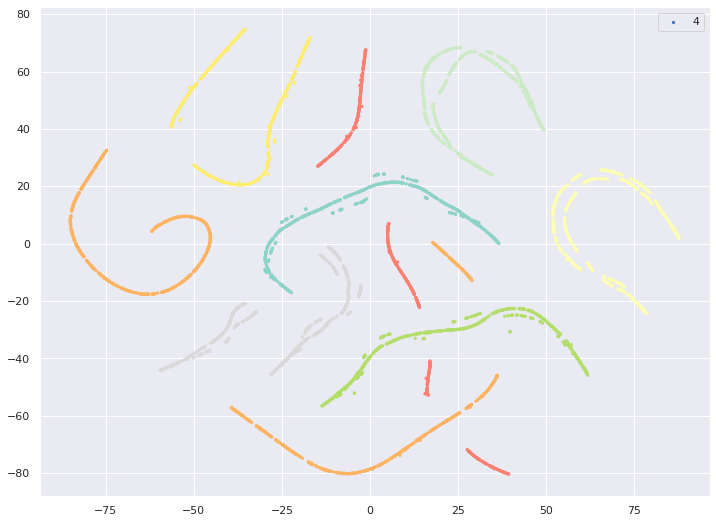

In [62]:
# Вспомогательные код

# import matplotlib.pyplot as plt

data_x = data_x_y.transpose()[0]
data_y = data_x_y.transpose()[1]

plt.figure(figsize=(12,9))

plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
plt.legend(cluster_labels)
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**